In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the CSV file
WVS = pd.read_csv('data/data.csv')

print(WVS.head())

              version                        doi  S001  S002VS  S003  \
0  5-0-0 (2024-04-30)  doi.org/10.14281/18241.25     2       3     8   
1  5-0-0 (2024-04-30)  doi.org/10.14281/18241.25     2       3     8   
2  5-0-0 (2024-04-30)  doi.org/10.14281/18241.25     2       3     8   
3  5-0-0 (2024-04-30)  doi.org/10.14281/18241.25     2       3     8   
4  5-0-0 (2024-04-30)  doi.org/10.14281/18241.25     2       3     8   

  COUNTRY_ALPHA  COW_NUM COW_ALPHA  S004  S006  ...     Y023A     Y023B  \
0           ALB      339       ALB     1     1  ...  0.000000  0.444444   
1           ALB      339       ALB     1     2  ...  0.111111  0.444444   
2           ALB      339       ALB     1     3  ...  0.000000  0.444444   
3           ALB      339       ALB     1     4  ...  0.000000  0.333333   
4           ALB      339       ALB     1     5  ...  0.000000  0.333333   

      Y023C  Y024A  Y024B  Y024C  survself  tradrat5   TradAgg  SurvSAgg  
0  0.444444   0.33    0.0  0.165 -1.01127

In [18]:
# Create a new column 'happy' where certain values are replaced with NaN
WVS['happy'] = WVS['A008'].apply(lambda x: x if x not in [-5, -4, -2, -1] else pd.NA)

# Filter out rows where 'happy' is NaN
WVS_clean = WVS.dropna(subset=['happy'])

# Group by 'S009A' and 'S002', calculate the mean of 'happy' ignoring NaN values
WaveCountryAves = WVS_clean.groupby(['COUNTRY_ALPHA', 'S002VS'], as_index=False).agg(meanhappy=('happy', 'mean'))

# Display the first few rows
print(WaveCountryAves.head())

  COUNTRY_ALPHA  S002VS meanhappy
0           ALB       3  2.735264
1           ALB       4  2.409869
2           AND       5  1.797392
3           AND       7  1.710159
4           ARG       1  2.057143


In [19]:
# Plotting the bar chart
# plt.figure(figsize=(10, 6))
# sns.countplot(x='happy', data=WVS_clean)
# plt.xlabel('Feeling of Happiness')  # Label for x-axis
# plt.ylabel('Count')  # Label for y-axis
# plt.title('Distribution of Feeling of Happiness')  # Title of the plot
# plt.show()

C:\Users\jaron\AppData\Local\Temp\ipykernel_25032\2574393076.py:14: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



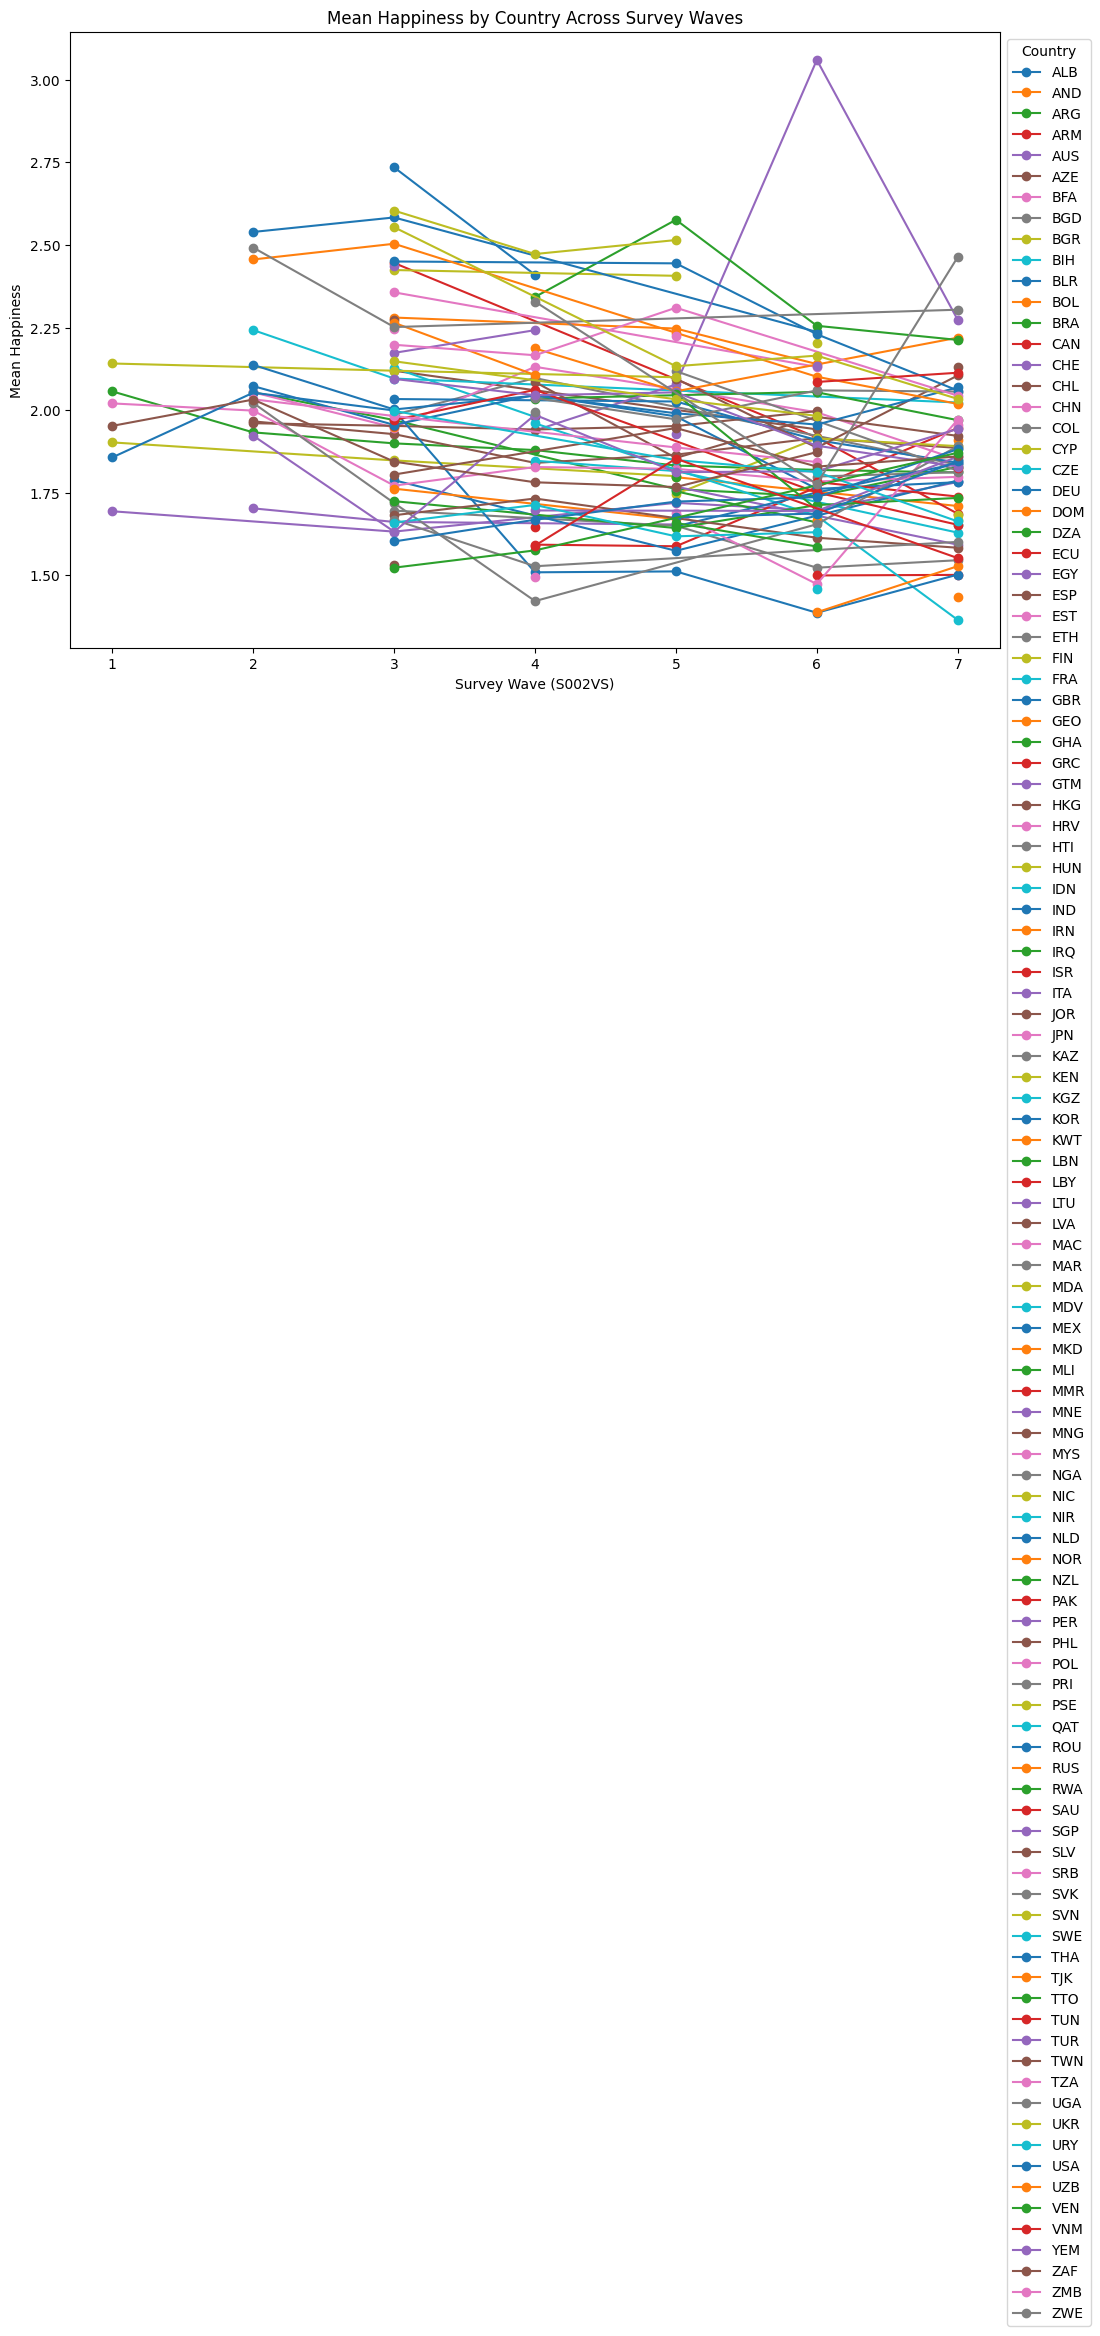

In [20]:
# Plotting
plt.figure(figsize=(12, 8))

# Loop through each country to plot its trend across waves
for country in WaveCountryAves['COUNTRY_ALPHA'].unique():
    country_data = WaveCountryAves[WaveCountryAves['COUNTRY_ALPHA'] == country]
    plt.plot(country_data['S002VS'], country_data['meanhappy'], marker='o', label=country)

# Adding labels and title
plt.xlabel('Survey Wave (S002VS)')
plt.ylabel('Mean Happiness')
plt.title('Mean Happiness by Country Across Survey Waves')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country')  # Puts legend outside the plot
plt.tight_layout()  # Adjust layout to make room for the legend
# plt.show()

In [ ]:
# Filter data for specified countries
selected_countries = ['AUS', 'CAN', 'CHN', 'RUS', 'DEU', 'LTU', 'CHE']  # ISO codes for Australia, Canada, China, Russia, Germany
WaveCountryAves_filtered = WaveCountryAves.query("COUNTRY_ALPHA in @selected_countries")

# Plotting
fig = px.line(
    WaveCountryAves_filtered,
    x='S002VS',
    y='meanhappy',
    color='COUNTRY_ALPHA',
    markers=True,
    labels={'S002VS': 'Survey Wave', 'meanhappy': 'Mean Happiness'},
    title='Mean Happiness by Country Across Survey Waves'
)

# Show the plot
fig.show()
